# Hough Transform

The Hough transform is a feature extraction technique used in image analysis, computer vision, and digital image processing. The purpose of the technique is to find imperfect instances of objects within a certain class of shapes by a voting procedure. This voting procedure is carried out in a parameter space, from which object candidates are obtained as local maxima in a so-called accumulator space that is explicitly constructed by the algorithm for computing the Hough transform.

![alt text](ideal.jfif "Title")

Source: Wikipedia 
Image source: Google Images

## Submission

You can code directly in the notebook - no more switching between tabs (Thank us later) 

All submissions will be via Gradescope. If you're completing this assignment in Jupyter Notebook, you must run the `notebook2script.py` file to export your work to a python file. To generate your submission file, run the command 

`python notebook2script.py submission`

and your file will be created under the `submission` directory.

PLEASE DON'T REMOVE THE #export FROM ANY CELL

# Setup

Use the cell below to load the required libraries (You are not allowed to use anything other than cv2 and numpy)

In [1]:
#export
import cv2 #Only to be used for Canny Edge Detector
import numpy as np
import test_simple as tests
Checker = tests.PS02Test()

Running on Windows system


# Part 1: Traffic Light [15 points]

In [22]:
def generate_hough_accumulator(gray, edges):
    dx, dy = np.gradient(gray)
    accu = np.zeros_like(gray)
    
    for index, currEdge in np.ndenumerate(edges):
        if currEdge != 0:
            r = 29
            for t in range(0,360,1):
                theta = np.radians(t)
                a = int(int(index[1] - (r * np.cos(theta))))
                b = int(int(index[0] + (r * np.sin(theta))))
                if (b in range(edges.shape[0])) and (a in range(edges.shape[1])):
                    accu[b,a] += 1

    return accu

def traffic_light_detection(img_in, radii_range):
    """Finds the coordinates of a traffic light image given a radii
    range.
    Use the radii range to find the circles in the traffic light and
    identify which of them represents the yellow light.
    Analyze the states of all three lights and determine whether the
    traffic light is red, yellow, or green. This will be referred to
    as the 'state'.
    It is recommended you use Hough transform to find these circles in
    the image.
    The input image may be just the traffic light with a white
    background or a larger image of a scene containing a traffic
    light.
    Args:
        img_in (numpy.array BGR): image containing a traffic light.
        radii_range (list): range of radii values to search for.
    Returns:
        tuple: 2-element tuple containing:
        coordinates (tuple): traffic light center using the (x, y)
                             convention.
        state (str): traffic light state. A value in {'red', 'yellow',
                     'green'}
        Numpy array: Height x Width matrix of Hough accumulator array  (Height and width from the image)
    """


    lights = ["red", "yellow", "green"]
    lowergray = np.array([10, 10, 10])
    uppergray = np.array([60, 60, 60])

    temp_img = np.copy(img_in)
    gray = cv2.inRange(temp_img, lowergray, uppergray)
    edges = cv2.Canny(gray, 25, 80)
    r, c = edges.shape
    
#     matrix = generate_hough_accumulator(gray, edges)

    circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,min(radii_range) * 2,param1=50,param2=30)
    matrix = circles ###############################
    res = ((0,0), "red"), matrix
    
    
    if circles is not None:
        circles = np.uint16(np.round(circles))[0, :, :-1]
        if len(circles) == 3:
            # find center of second circle
            median_center = np.median(circles, axis=0)
            median_center = median_center[1]
            middle_circle = circles[np.where(circles[:, 1] == median_center)][0]
            centroid = middle_circle
            # Use HSV to find the brightest circle by V
            hsv_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2HSV)
            values_v = [hsv_img[y, x, 2] for x, y in circles]
            state = lights[np.argmax(values_v)]
            res = ((centroid, state), matrix)

    return res

## Run the tests below to verify your code

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


result is: (array([270, 344], dtype=uint16), 'red')
(array([270, 344], dtype=uint16), 'red')


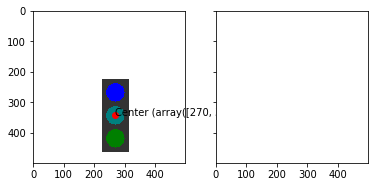

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


UnitTest testTrafficLightBlank passed successfully!
result is: (array([270, 344], dtype=uint16), 'red')
(array([270, 344], dtype=uint16), 'red')


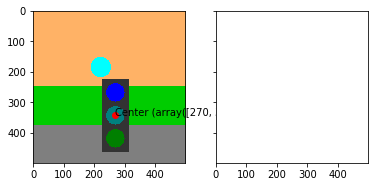

UnitTest testTrafficLightScene passed successfully!


In [23]:
##### CODE BELOW IS USED FOR RUNNING LOCAL TEST - COMMENT/UNCOMMENT TESTS WHILE DEBUGGING ######
Checker.testTrafficLightBlank(traffic_light_detection)
Checker.testTrafficLightScene(traffic_light_detection)
#Don't worry about the color reversal in your plots
################ END OF LOCAL TEST CODE SECTION ################################################

# Part 2: Traffic Signs one per scene [25 points]

In [24]:
class Line:
    def __init__(self, line):
        self.line = line
        self.x1 = self.line[0]
        self.y1 = self.line[1]
        self.x2 = self.line[2]
        self.y2 = self.line[3]
        self.length = np.sqrt((self.x2 - self.x1)**2 + (self.y2 - self.y1)**2)
        self.deno = self.x2 - self.x1
        if self.deno == 0:
            self.angle = 90
        else:
            self.angle = np.arctan((self.y2 - self.y1)/self.deno)/np.pi * 180
        self.mid = ((self.x1 + self.x2)/2, (self.y1 + self.y2)/2)


In [25]:
#export
def yield_sign_detection(img_in):
    """Finds the centroid coordinates of a yield sign in the provided
    image.
    Args:
        img_in (numpy.array BGR): image containing a traffic light.
    Returns:
        (x,y) tuple of coordinates of the center of the yield sign.
        Numpy array: Height x Width matrix of Hough accumulator array  (Height and width from the image)
    """
    lowergray = np.array([10, 10, 10])
    uppergray = np.array([60, 60, 60])

    temp_img = np.copy(img_in)
    gray = cv2.inRange(temp_img, lowergray, uppergray)  
    edges = cv2.Canny(img_in, 100, 50).astype(np.uint8)

    lines = cv2.HoughLinesP(edges, rho=1, theta=2*np.pi/180, threshold=30, minLineLength=20, maxLineGap=1)
    
#     matrix = generate_hough_accumulator(gray, edges)
    matrix = lines
     
    error = 5
    L0 = []
    A0 = []
    L60 = []
    A60 = []
    Ln60 = []
    An60 = []
    coordinates = (0, 0)

    if lines is not None:
        for line in lines:
            line = Line(line.flatten())

            if line.length < 500 and line.angle > (0 - error) and line.angle < (0 + error):
                A0.append(line.length)
                L0.append(line)

            if line.length < 500 and line.angle > (60 - error) and line.angle < (60 + error):   
                A60.append(line.length)
                L60.append(line)


            if line.length < 500 and line.angle > (-60 - error) and line.angle < (-60 + error):
                An60.append(line.length)
                Ln60.append(line)

        if (len(L60) != 0):
            line60 = L60[np.argsort(A60)[-1]].line  ## 1
            line0 = L0[np.argsort(A0)[-1]].line
            linen60 = Ln60[np.argsort(An60)[-1]].line  ## 3

            mid60 = L60[np.argsort(A60)[-1]].mid
            mid0 = L0[np.argsort(A0)[-1]].mid
            midn60 = Ln60[np.argsort(An60)[-1]].mid

            x = int(mid0[0])
            upx = mid0[0]
            upy = mid0[1]
            botx = (line60[2] + linen60[0])/2
            boty = (line60[3] + linen60[1])/2
            y = int((boty - upy)/3 + upy)

            coordinates = (x, y)
            pixels = img_in[y, x, :]
            if pixels[0] > 220 and pixels[1] > 220 and pixels[2] > 220 :
                return (coordinates, matrix)
            else:
                return ((0,0), matrix)

    return (coordinates, matrix)

In [26]:
#export
def StopSign(img_in,line):
    r, c, channel = img_in.shape
    error = 10
    upperx = int(line.mid[0] + error)
    uppery = int(line.mid[1] + error)
    lowerx = int(line.mid[0] - error)
    lowery = int(line.mid[1] - error)
    if ((img_in[uppery, upperx, 0] <15 and img_in[uppery, upperx, 1]<15) 
     or (img_in[lowery, lowerx, 0]<15 and img_in[uppery, lowery, 1]<15)):
        return True
    else:
        return False
    return True

def stop_sign_detection(img_in):
    """Finds the centroid coordinates of a stop sign in the provided
    image.
    Args:
        img_in (numpy.array BGR): image containing a traffic light.
    Returns:
        (x,y) tuple of the coordinates of the center of the stop sign.
        Numpy array: Height x Width matrix of Hough accumulator array  (Height and width from the image)
    """
    
    
    
    lowergray = np.array([10, 10, 10])
    uppergray = np.array([60, 60, 60])

    temp_img = np.copy(img_in)
    gray = cv2.inRange(temp_img, lowergray, uppergray)  
    edges = cv2.Canny(img_in, 100, 50).astype(np.uint8)

    lines = cv2.HoughLinesP(edges, rho=1, theta=2*np.pi/180, threshold=30, minLineLength=20, maxLineGap=1)
    
#     matrix = generate_hough_accumulator(gray, edges)
    matrix = lines
#     edges = cv2.Canny(img_in, 50, 100)
#     lines = cv2.HoughLinesP(edges, rho=1, theta=2*np.pi/180, threshold=30, minLineLength=20, maxLineGap=1)
#     matrix = generate_hough_accumulator(edges)
    
    Line_list = []
    A45 = []
    An45 = []
    error = 5
    coordinates = (0, 0)
    
    if lines is not None:
        for line in lines:
            line =  Line(line.flatten())


            if line.angle != 0 and StopSign(img_in,line) is True:
                Line_list.append(line)
                A45.append(np.abs(line.angle - 45))
                An45.append(np.abs(line.angle + 45))

        if (len(A45) < 2) or len(An45) < 2:
            return (coordinates, matrix)

        index = np.argsort(An45)
        line1 = Line_list[index[0]]
        line2 = Line_list[index[1]]
        if line1.angle < (-45 - error) or line1.angle > (-45 + error)  or line2.angle < (-45 - error) or line2.angle > (-45 + error) :
            return (coordinates, matrix)

        col = int((line1.mid[0] + line2.mid[0])/2)
        row = int((line1.mid[1] + line2.mid[1])/2)

        coordinates = (col, row)

    return (coordinates, matrix)

In [27]:
def WarnSign(img_in,line):
    r ,c , channel = img_in.shape
    error = 5
    upperx = int(line.mid[0] + error)
    uppery = int(line.mid[1] + error)
    lowerx = int(line.mid[0] - error)
    lowery = int(line.mid[1] - error)

    if ((img_in[uppery, upperx, 0] < 15 and img_in[uppery, upperx, 1] > 240 and img_in[uppery, upperx, 2] > 240)
     or (img_in[lowery, lowerx, 0] < 15 and img_in[uppery, lowery, 1] > 240 and img_in[uppery, upperx, 2] > 240 )):
        return True
    else:
        return False
    return True

#export
def warning_sign_detection(img_in):
    """Finds the centroid coordinates of a warning sign in the
    provided image.
    Args:
        img_in (numpy.array BGR): image containing a traffic light.
    Returns:
        (x,y) tuple of the coordinates of the center of the sign.
        Numpy array: Height x Width matrix of Hough accumulator array  (Height and width from the image)
    """

    lowergray = np.array([10, 10, 10])
    uppergray = np.array([60, 60, 60])

    temp_img = np.copy(img_in)
    gray = cv2.inRange(temp_img, lowergray, uppergray)  
    edges = cv2.Canny(img_in, 100, 50).astype(np.uint8)

    lines = cv2.HoughLinesP(edges, rho=1, theta=2*np.pi/180, threshold=30, minLineLength=20, maxLineGap=1)
    
#     matrix = generate_hough_accumulator(gray, edges)
    matrix = lines
    
    coordinates = (0, 0)
    
    Line_list = []
    A45 = []
    An45 = []
    error = 5
    
    if lines is not None:
        for line in lines:
            line =  Line(line.flatten())

            if line.angle != 0 and WarnSign(img_in,line) is True:
                Line_list.append(line)
                A45.append(np.abs(line.angle - 45))
                An45.append(np.abs(line.angle + 45))

        if (len(A45) < 2) or len(An45) < 2:
            return (coordinates, matrix)

        index45 = np.argsort(A45)
        line1, line2 = Line_list[index45[0]], Line_list[index45[1]]

        indexn45 = np.argsort(An45)
        line3, line4 = Line_list[indexn45[0]], Line_list[indexn45[1]]

        col = (int((line1.mid[0] + line2.mid[0])/2) + int((line3.mid[0] + line4.mid[0])/2))//2 + 1
        row = (int((line1.mid[1] + line2.mid[1])/2) + int((line3.mid[1] + line4.mid[1])/2))//2 + 1

        coordinates = (col, row)

    return (coordinates, matrix)

In [28]:
#export

def ConsSign(img_in,line):
    r ,c , channel = img_in.shape
    error = 5
    upperx = int(line.mid[0] + error)
    uppery = int(line.mid[1] + error)
    lowerx = int(line.mid[0] - error)
    lowery = int(line.mid[1] - error)

    if ((img_in[uppery, upperx, 0] < 15 and img_in[uppery, upperx, 1] > 110 and img_in[uppery, upperx, 1] < 150 and img_in[uppery, upperx, 2] > 240)
     or (img_in[lowery, lowerx, 0] < 15 and img_in[uppery, lowery, 1] > 110 and img_in[uppery, upperx, 1] < 150 and img_in[uppery, upperx, 2] > 240 )):
        return True
    else:
        return False
    return True


def construction_sign_detection(img_in):
    """Finds the centroid coordinates of a construction sign in the
    provided image.
    Args:
        img_in (numpy.array BGR): image containing a traffic light.
    Returns:
        (x,y) tuple of the coordinates of the center of the sign.
        Numpy array: Height x Width matrix of Hough accumulator array  (Height and width from the image)
    """
    
    edges = cv2.Canny(img_in, 100, 50)
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=10, minLineLength=30, maxLineGap=2)
#     matrix = generate_hough_accumulator(edges, edges)
    matrix = lines
    
    Line_list = []
    A45 = []
    An45 = []
    error = 5
    coordinates = (0, 0)

    if lines is not None:
        for line in lines:
            line =  Line(line.flatten())

            if line.length < 500 and line.angle != 0 and ConsSign(img_in,line) is True:
                Line_list.append(line)
                A45.append(np.abs(line.angle - 45))
                An45.append(np.abs(line.angle + 45))

        if (len(A45) == 0) or (len(An45) == 0):
            return (coordinates, matrix)

        index45 = np.argsort(A45)
        line1, line2 = Line_list[index45[0]], Line_list[index45[1]]

        indexn45 = np.argsort(An45)
        line3, line4 = Line_list[indexn45[0]], Line_list[indexn45[1]]

        col = (int((line1.mid[0] + line2.mid[0])/2) + int((line3.mid[0] + line4.mid[0])/2))//2 + 1
        row = (int((line1.mid[1] + line2.mid[1])/2) + int((line3.mid[1] + line4.mid[1])/2))//2 + 1

        coordinates = (col, row)

    return (coordinates, matrix)



In [29]:
#export
def do_not_enter_sign_detection(img_in):
    """Find the centroid coordinates of a do not enter sign in the
    provided image.
    Args:
        img_in (numpy.array BGR): image containing a traffic light.
    Returns:
        (x,y) typle of the coordinates of the center of the sign.
        Numpy array: Height x Width matrix of Hough accumulator array  (Height and width from the image)
    """
    
    lowergray = np.array([10, 10, 10])
    uppergray = np.array([60, 60, 60])

    temp_img = np.copy(img_in)
    gray = cv2.inRange(temp_img, lowergray, uppergray)  
    edges = cv2.Canny(img_in, 100, 50).astype(np.uint8)

    lines = cv2.HoughLinesP(edges, rho=1, theta=2*np.pi/180, threshold=30, minLineLength=20, maxLineGap=1)
    
#     matrix = generate_hough_accumulator(gray, edges)
    matrix = lines

    circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,20, param1=50,param2=30) 
    coordinates = (0,0)
    res = (coordinates,matrix)
    
    if circles is not None:
        for circle in circles[0, :]:
            col = circle[0]
            row = circle[1]
            coordinates = (col, row)
            check = img_in[int(row), int(col), :]
            if check[0] == 255 and check[1] == 255 and check[2] == 255 :
                print(coordinates)
                res = (coordinates,matrix)
    return res

## Run the tests below to verify your code and generate output

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(273, 272)


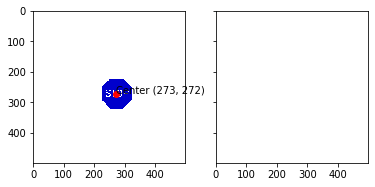

UnitTest testStopSignBlank passed successfully!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(273, 272)


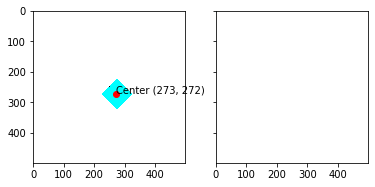

UnitTest testWarningSignBlank passed successfully!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(275, 273)


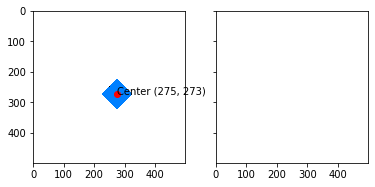

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


UnitTest testConstructionSignBlank passed successfully!
(272.5, 273.5)
(272.5, 273.5)


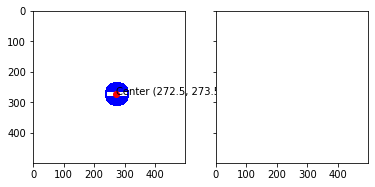

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


UnitTest testDoNotEnterSignBlank passed successfully!
(281, 252)


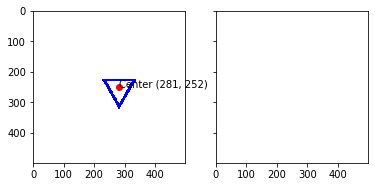

UnitTest jutestYieldSignBlank passed successfully!


In [30]:
##### CODE BELOW IS USED FOR RUNNING LOCAL TEST - COMMENT/UNCOMMENT TESTS WHILE DEBUGGING ######
Checker.testStopSignBlank(stop_sign_detection)
Checker.testWarningSignBlank(warning_sign_detection)
Checker.testConstructionSignBlank(construction_sign_detection)
Checker.testDoNotEnterSignBlank(do_not_enter_sign_detection)
Checker.testYieldSignBlank(yield_sign_detection)
#Don't worry about the color reversal in your plots
################ END OF LOCAL TEST CODE SECTION ################################################

# Part 3: Multiple signs in a scene [10 points]

In [32]:
#export
def traffic_sign_detection(img_in):
    """Finds all traffic signs in a synthetic image.
    The image may contain at least one of the following:
    - traffic_light
    - no_entry
    - stop
    - warning
    - yield
    - construction
    Use these names for your output.
    See the instructions document for a visual definition of each
    sign.
    (Hint: Use all the functions defined above)
    Args:
        img_in (numpy.array BGR): input image containing at least one
                              traffic sign.
    Returns:
        dict: dictionary containing only the signs present in the
              image along with their respective centroid coordinates
              as tuples.
              For example: {'stop': (1, 3), 'yield': (4, 11)}
              These are just example values and may not represent a
              valid scene.
    """
    
    dict = {}

    img_traffic = np.copy(img_in)
    img_notenter = np.copy(img_in)
    img_stop = np.copy(img_in)
    img_warn = np.copy(img_in)
    img_yields = np.copy(img_in)
    img_cons = np.copy(img_in)
    
    radii_range = range(10, 30, 1)
    (traffic,color),mat = traffic_light_detection(img_traffic,radii_range)
    notenter, mat = do_not_enter_sign_detection(img_notenter)
    stop, mat = stop_sign_detection(img_stop)
    warn, mat = warning_sign_detection(img_warn)
    yields, mat = yield_sign_detection(img_yields)
    cons, mat = construction_sign_detection(img_cons)

    
    
    if traffic is not None:
        dict['traffic_light'] = (traffic[0], traffic[1])
    if notenter != (0, 0):
        dict['no_entry'] = (notenter[0], notenter[1])
    if stop != (0,0):
        dict['stop'] = (stop[0], stop[1])
    if warn != (0,0):
        dict['warning'] = (warn[0], warn[1])
    if yields != (0,0):
        dict['yield'] = (yields[0], yields[1])
    if cons != (0,0):
        dict['construction'] = (cons[0], cons[1])
        
    
    print (dict)
    return dict

    raise NotImplementedError

## Run the tests below to verify your code and generate output

In [33]:
##### CODE BELOW IS USED FOR RUNNING LOCAL TEST - COMMENT/UNCOMMENT TESTS WHILE DEBUGGING ######
Checker.testTrafficSignScene(traffic_sign_detection)
#Don't worry about the color reversal in your plots
################ END OF LOCAL TEST CODE SECTION ################################################

{'traffic_light': (270, 344)}
{'traffic_light': (270, 344)}
(272.5, 273.5)
{'traffic_light': (0, 0), 'no_entry': (272.5, 273.5)}
{'traffic_light': (0, 0), 'no_entry': (272.5, 273.5)}
UnitTest testTrafficSignScene passed successfully!


# Part 4: Extra Credit for CS 4476/ Regular section for CS 6476 [20 points]

Let's move on to the real world because you are not in a simulation. Don't believe Elon Musk.

In [50]:
#export
def detectCircles(im, radius, useGradient = False):
    """
    Args:
        im (numpy.array RGB):the input image
        radius : specifies the radius of the circle 
        useGradient: a flag that allows the user to optionally exploit the gradient direction measured at the edgepoints.
    (Caution: Your x,y maybe swapped)
    Returns:
        Numpy array: N x 2 matrix in which each row lists the (x,y) position of a detectedcircles’ center
        Numpy array: Height x Width matrix of Hough accumulator array  (Height and width from the image)
    
    """
    lowergray = np.array([10, 10, 10])
    uppergray = np.array([60, 60, 60])

    temp_img = np.copy(im)
    gray = cv2.inRange(temp_img, lowergray, uppergray)
    edges = cv2.Canny(gray, 25, 80)    
    
    dx, dy = np.gradient(gray)
    gradientThetas = np.arctan2(-dy, dx)
    
    accu = np.zeros_like(gray)
    
    for index, currEdge in np.ndenumerate(edges):
        if currEdge != 0:
            r = radius
            x = index[1]
            y = index[0]
            for t in range(0,360,5):
                theta = np.radians(t)
                a = int(int(x - (r * np.cos(theta))))
                b = int(int(y + (r * np.sin(theta))))
                if (b in range(edges.shape[0])) and (a in range(edges.shape[1])):
                    accu[b,a] += 1

    maxaccum = np.max(accu)
    centers = np.transpose(np.nonzero(accu >= (maxaccum * 0.95)))
    center = np.zeros(centers.shape)
    center[:,0] = centers[:,1]
    center[:,1] = centers[:,0]
    aa = center[0:9,:]
    res = (aa, accu)

    return res

## Run the tests below to verify your code and generate output

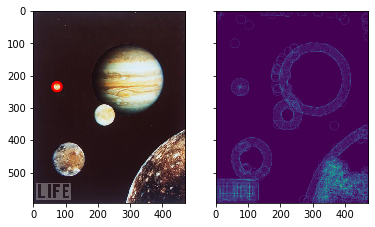

UnitTest testHoughstransform passed successfully!
Time elapsed: 3.330826759338379


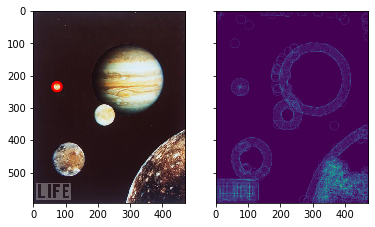

UnitTest testHoughstransform_withgradient passed successfully!


In [51]:
##### CODE BELOW IS USED FOR RUNNING LOCAL TEST - COMMENT/UNCOMMENT TESTS WHILE DEBUGGING ######
Checker.testHoughtransform(detectCircles) #You can modify the radius and centers in tests file
Checker.testHoughtransformwithgradient(detectCircles) # You can modify the radius and centers in the tests file
################ END OF LOCAL TEST CODE SECTION ################################################

# (Optional) Bonus section for CS 4476/6476 [10 points]: 

In [38]:
#export
def  detectMultipleCircles(im, radius_min,radius_max):
    """
    Args:
        im (numpy.array RGB):the input image
        radius_min : specifies the minimum radius of the circle 
        radius_max : specifies the maximum radius of the circle
       
    (Caution: Your x,y maybe swapped)
    Returns:
        Numpy array: N x 2 matrix in which each row lists the (x,y) position of a detectedcircles’ center
        Numpy array: Height x Width matrix of Hough accumulator array (Height and width from the image)
    
    """
#     lowergray = np.array([10, 10, 10])
#     uppergray = np.array([60, 60, 60])

#     temp_img = np.copy(im)
#     gray = cv2.inRange(temp_img, lowergray, uppergray)
#     edges = cv2.Canny(gray, 25, 80)    

#     dx, dy = np.gradient(gray)
#     gradientThetas = np.arctan2(-dy, dx)
    
#     accu = np.zeros_like(gray)
    
#     for index, currEdge in np.ndenumerate(edges):
#         if currEdge != 0:
#             for r in range(radius_min, radius_max, 5):
#                 x = index[1]
#                 y = index[0]
#                 for t in range(0,360,5):
#                     theta = np.radians(t)
#                     a = int(int(x - (r * np.cos(theta))))
#                     b = int(int(y + (r * np.sin(theta))))
#                     if (b in range(edges.shape[0])) and (a in range(edges.shape[1])):
#                         accu[b,a] += 1

#     maxaccum = np.max(accu)
#     centers = np.transpose(np.nonzero(accu >= (maxaccum * .98)))
#     center = np.zeros(centers.shape)
#     center[:,0] = centers[:,1]
#     center[:,1] = centers[:,0]
    
#     res = (center, accu)
    
#     return res

## Run the tests below to verify your code and generate output

In [39]:
#### CODE BELOW IS USED FOR RUNNING LOCAL TEST - COMMENT/UNCOMMENT TESTS WHILE DEBUGGING ######
# Checker.testHoughtransformMultiple(detectMultipleCircles)
############### END OF LOCAL TEST CODE SECTION ################################################

AssertionError: False is not true : None of the centers returned matched the original ones